<a href="https://colab.research.google.com/github/chandan2311/Machine-learning/blob/main/mnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.4):
      print("\n loss is lower thn 0.4 so cancelling training!")
      self.model.stop_training=True
callbacks=myCallback()

In [17]:
fmnist=keras.datasets.mnist

In [18]:
(training_images,training_label),(testing_images,testing_label)=fmnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [19]:
print(len(training_label))

60000


In [20]:
print(len(training_images))

60000


In [21]:
import numpy as np
import matplotlib.pyplot as plt

index=11
np.set_printoptions(linewidth=320)

print(f"Label:{training_label[index]}")
print(f"images:{training_images[index]}")

Label:5
images:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  40 129 234 234 159   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

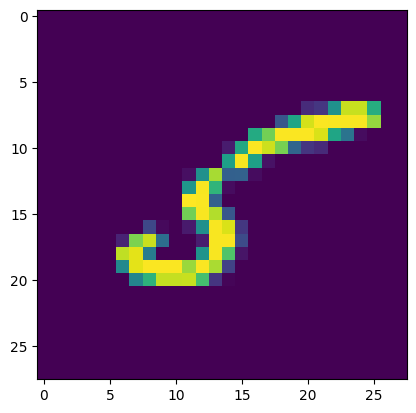

In [22]:
plt.imshow(training_images[index])

In [23]:
len(training_images)

60000

In [24]:
training_images=training_images/255.0
testing_images=testing_images/255.0

In [25]:
model=keras.models.Sequential([keras.layers.Flatten(),keras.layers.Dense(128,activation=tf.nn.relu),keras.layers.Dense(10,activation=tf.nn.softmax)])

In [26]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [27]:
len(training_images)

60000

In [28]:
model.fit( training_images, training_label,epochs=25,callbacks=[callbacks])

Epoch 1/25
1853/1875 [============================>.] - ETA: 0s - loss: 0.2555 - accuracy: 0.9268
 loss is lower thn 0.4 so cancelling training!
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2542 - accuracy: 0.9272


In [29]:
model.evaluate(testing_images,testing_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9595


[0.13347376883029938, 0.9595000147819519]